<a href="https://colab.research.google.com/github/JoseGallardoArb/UsefullApplications/blob/main/PBIForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyección del PBI


---
Autor: José Diego Gallardo Arbildo

Comentarios y observaciones a: jose.gallardoa@pucp.pe

El presente código tiene por objetivo realizar proyecciones del PBI en base a una estructura ARMA para esta variable y apoyandose con la proyección de los 10 mejores predictores del PBI identificados por F. Perez (2018).

## Carga y Visualización de datos

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/JoseGallardoArb/Data/main/PBIForecastData.csv" 
df = pd.read_csv(url)
df['DATE']=pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.head()

,PBI,PELEC,CINTC,VOLINPUT,INDPRO,INGRESO,CREDMN,IGBVL
DATE,,,,,,,,
2004-01-01,3.674966,4.229032,6.868890,-16.532481,1.37359,-1.077056,13.514563,79.913009
2004-02-01,4.245959,7.350977,6.468289,9.215095,1.84294,1.173879,9.453369,76.578574
2004-03-01,5.774257,5.436382,7.780494,-2.812554,1.57144,2.601558,8.226966,94.734749
2004-04-01,4.247995,6.194900,2.201965,7.594470,2.76450,3.193371,5.003304,59.889402
2004-05-01,3.950757,6.124446,2.770659,19.005229,3.55004,0.972555,4.772573,61.851754


Text(0.5, 1.0, 'Indice General Bolsa de Valores de Lima')

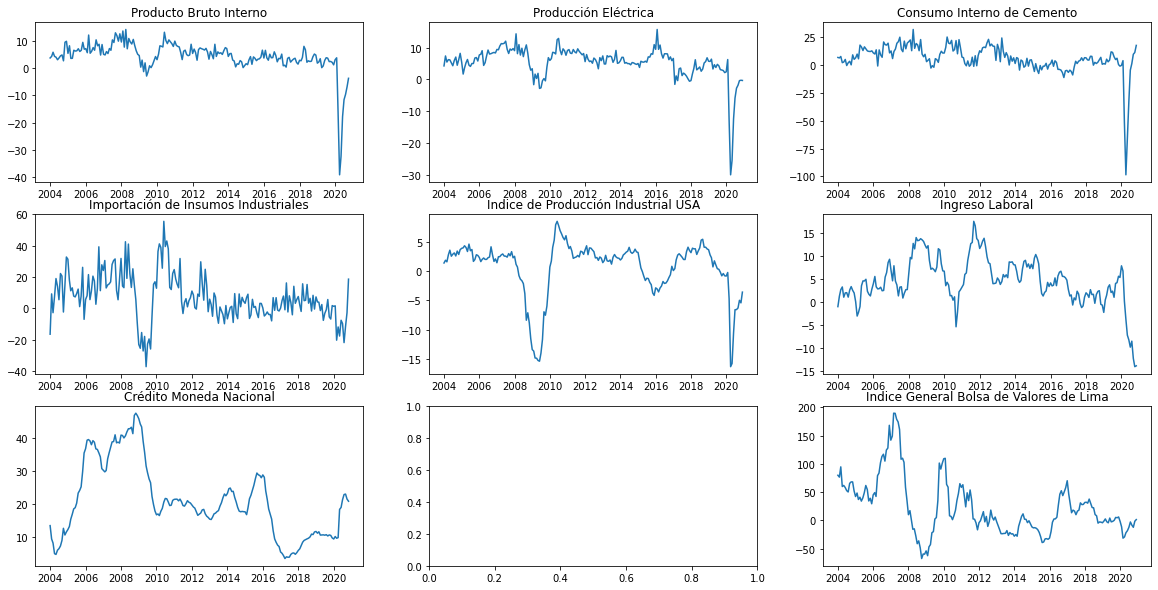

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3,figsize=(20, 10))
axs[0, 0].plot(df["PBI"])
axs[0, 0].set_title("Producto Bruto Interno")
axs[0, 1].plot(df["PELEC"])
axs[0, 1].set_title('Producción Eléctrica')
axs[0, 2].plot(df["CINTC"])
axs[0, 2].set_title('Consumo Interno de Cemento')
axs[1, 0].plot(df["VOLINPUT"])
axs[1, 0].set_title("Importación de Insumos Industriales")
axs[1, 1].plot(df["INDPRO"])
axs[1, 1].set_title("Indice de Producción Industrial USA")
axs[1, 2].plot(df["INGRESO"])
axs[1, 2].set_title("Ingreso Laboral")
axs[2, 0].plot(df["CREDMN"])
axs[2, 0].set_title("Crédito Moneda Nacional")
axs[2, 2].plot(df["IGBVL"])
axs[2, 2].set_title("Indice General Bolsa de Valores de Lima")

## Selección de rezago óptimo por variable

In [3]:
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

p = range(0, 13)
d = q = range(0, 1)
pdq = list(itertools.product(p, d, q))

lagresults = pd.DataFrame(columns=df.columns, index=p)

for r in list(range(0,13)):
  for c in df.columns:  
    mod = sm.tsa.statespace.SARIMAX(df[c],
                                    order=pdq[r],
                                    trend = 'c')
    results = mod.fit()            
    #print('{}x{} - AIC:{}'.format(pdq[r], c, results.aic))
    lagresults[c][r] = results.bic
print("Criterios de Schwartz para distintos rezagos AR")
lagresults 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Criterios de Schwartz para distintos rezagos AR


,PBI,PELEC,CINTC,VOLINPUT,INDPRO,INGRESO,CREDMN,IGBVL
0,1293.15,1248.19,1627.57,1674.28,1221.4,1243.93,1566.79,2184.61
1,1063.74,1008.38,1445.39,1550.48,728.821,830.464,799.099,1679.18
2,1067.58,1009.69,1448.84,1542.11,712.961,830.241,755.186,1681.61
3,1072.67,1014.39,1454,1538.82,716.295,833.114,747.271,1677.34
4,1076.13,1013.61,1458.2,1544.12,720.064,838.026,750.107,1675.92
5,1081.43,1017.08,1461.74,1545.11,719.249,842.815,755.128,1680.67
6,1086.74,1020.43,1466.76,1546.7,722.903,848.107,760.445,1685.96
7,1091.38,1025.68,1471.94,1550.23,723.536,853.429,763.978,1691.23
8,1095.22,1028.6,1477.26,1552.32,726.522,852.739,769.055,1695.68
9,1099.33,1033.81,1482.57,1557.55,731.621,858.013,771.366,1701.01


In [4]:
for c in lagresults.columns:
  lagresults[c] = pd.to_numeric(lagresults[c])
print("Rezagos AR optimos por variables según criterio de Schwartz")
lagresults.idxmin()

Rezagos AR optimos por variables según criterio de Schwartz


PBI         1
PELEC       1
CINTC       1
VOLINPUT    3
INDPRO      2
INGRESO     2
CREDMN      3
IGBVL       4
dtype: int64

## Predicción de las variables auxiliares

In [5]:
df.tail()

,PBI,PELEC,CINTC,VOLINPUT,INDPRO,INGRESO,CREDMN,IGBVL
DATE,,,,,,,,
2020-09-01,-6.945,-1.852153,9.73,-11.497408,-6.28076,-12.305923,23.080085,-8.437252
2020-10-01,-3.790,-0.399158,11.32,-2.836825,-4.97235,-14.108501,21.581743,-12.221481
2020-11-01,NaN,-0.281037,17.72,18.628586,-5.40773,-13.921101,20.914876,-1.401982
2020-12-01,NaN,-0.349109,NaN,NaN,-3.58249,NaN,NaN,1.442162
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Predicción IGBVL')

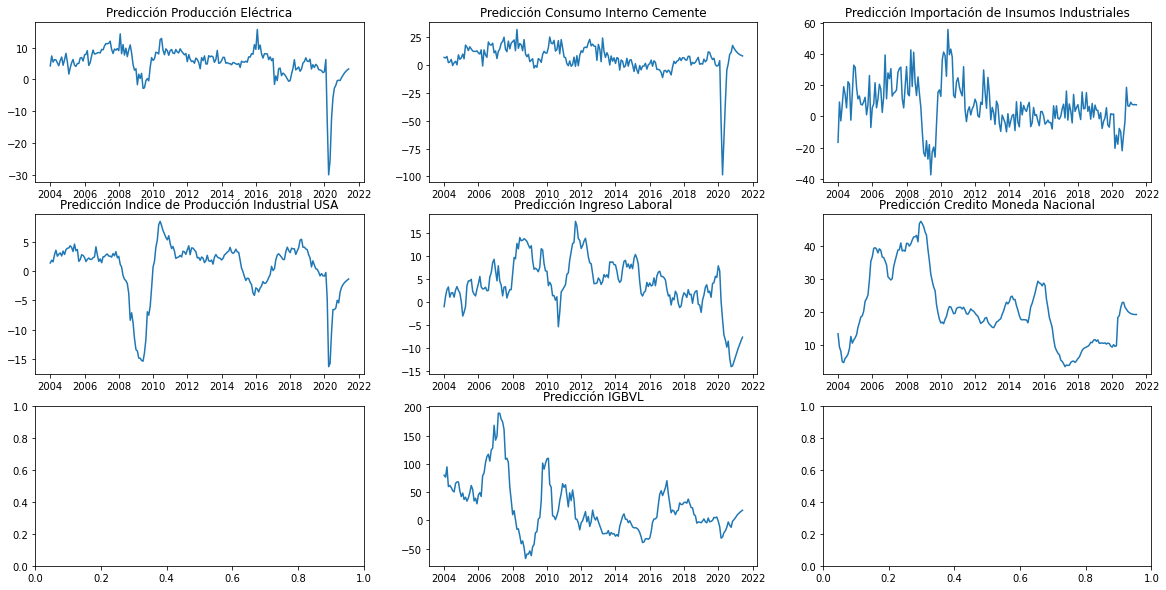

In [6]:
# Predicción Producción Electrica - PELEC
pelecmod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-12-01']["PELEC"],
                                order=(1, 0, 0),
                                trend='c')
results_pelec = pelecmod.fit()
pred_pelec = results_pelec.get_forecast(steps=6)
# pred_ci = pred_uc.conf_int() # CI for prediction
frames = [df['2004-01-01':'2020-12-01']["PELEC"],pred_pelec.predicted_mean]
pelec_f = pd.concat(frames)

# Consumo Interno de Cemento - CINTC
cintcmod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-11-01']["CINTC"],
                                order=(1, 0, 0),
                                trend='c')
results_cintc = cintcmod.fit()
pred_cintc = results_cintc.get_forecast(steps=7)
frames = [df['2004-01-01':'2020-11-01']["CINTC"],pred_cintc.predicted_mean]
cintc_f = pd.concat(frames)

# Volumen de Insumos Industriales - VOLINPUT
volinputmod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-11-01']["VOLINPUT"],
                                order=(3, 0, 0),
                                trend='c')
results_volinput = volinputmod.fit()
pred_volinput = results_volinput.get_forecast(steps=7)
frames = [df['2004-01-01':'2020-11-01']["VOLINPUT"],pred_volinput.predicted_mean]
volinput_f = pd.concat(frames)

# Indice de producción industrial - INDPRO
indpromod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-12-01']["INDPRO"],
                                order=(2, 0, 0),
                                trend='c')
results_indpro = indpromod.fit()
pred_indpro = results_indpro.get_forecast(steps=6)
frames = [df['2004-01-01':'2020-12-01']["INDPRO"],pred_indpro.predicted_mean]
indpro_f = pd.concat(frames)

# Indice Laboral - INGRESO
ingresomod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-11-01']["INGRESO"],
                                order=(2, 0, 0),
                                trend='c')
results_ingreso = ingresomod.fit()
pred_ingreso = results_ingreso.get_forecast(steps=7)
frames = [df['2004-01-01':'2020-11-01']["INGRESO"],pred_ingreso.predicted_mean]
ingreso_f = pd.concat(frames)

# Credito Moneda Nacional - CREDMN
credmnmod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-11-01']["CREDMN"],
                                order=(3, 0, 0),
                                trend='c')
results_credmn = credmnmod.fit()
pred_credmn = results_credmn.get_forecast(steps=7)
frames = [df['2004-01-01':'2020-11-01']["CREDMN"],pred_credmn.predicted_mean]
credmn_f = pd.concat(frames)

# Indice General Bolsa de Valores de Lima - IGBVL
igbvlmod = sm.tsa.statespace.SARIMAX(df['2004-01-01':'2020-12-01']["IGBVL"],
                                order=(4, 0, 0),
                                trend='c')
results_igbvl = igbvlmod.fit()
pred_igbvl = results_igbvl.get_forecast(steps=6)
frames = [df['2004-01-01':'2020-12-01']["IGBVL"],pred_igbvl.predicted_mean]
igbvl_f = pd.concat(frames)


fig, axs = plt.subplots(3, 3,figsize=(20, 10))
axs[0, 0].plot(pelec_f)
axs[0, 0].set_title("Predicción Producción Eléctrica")
axs[0, 1].plot(cintc_f)
axs[0, 1].set_title("Predicción Consumo Interno Cemente")
axs[0, 2].plot(volinput_f)
axs[0, 2].set_title("Predicción Importación de Insumos Industriales")
axs[1, 0].plot(indpro_f)
axs[1, 0].set_title("Predicción Indice de Producción Industrial USA")
axs[1, 1].plot(ingreso_f)
axs[1, 1].set_title("Predicción Ingreso Laboral")
axs[1, 2].plot(credmn_f)
axs[1, 2].set_title("Predicción Credito Moneda Nacional")
axs[2, 1].plot(igbvl_f)
axs[2, 1].set_title("Predicción IGBVL")


## Predicción del PBI

In [7]:
# Definiendo las variables exógenas
exo = pd.concat([pelec_f,cintc_f,volinput_f,pelec_f.shift(),cintc_f.shift(),indpro_f,ingreso_f.shift(),volinput_f.shift(),credmn_f,igbvl_f.shift()],axis=1).dropna()
# Generando el training sample
pbimod = sm.tsa.SARIMAX(df['2004-02-01':'2020-10-01']["PBI"], order=(1, 0, 0), exog=exo['2004-02-01':'2020-10-01'],trend='c')
# Generando predicción
results_pbi = pbimod.fit()
pred_pbi = results_pbi.get_forecast(steps=8,exog=exo['2020-11-01':'2021-06-01'])
# Obteniendo la serie final
frames = [df['2004-01-01':'2020-10-01']["PBI"],pred_pbi.predicted_mean]
pbi_f = pd.concat(frames)

## Grafico de la proyección


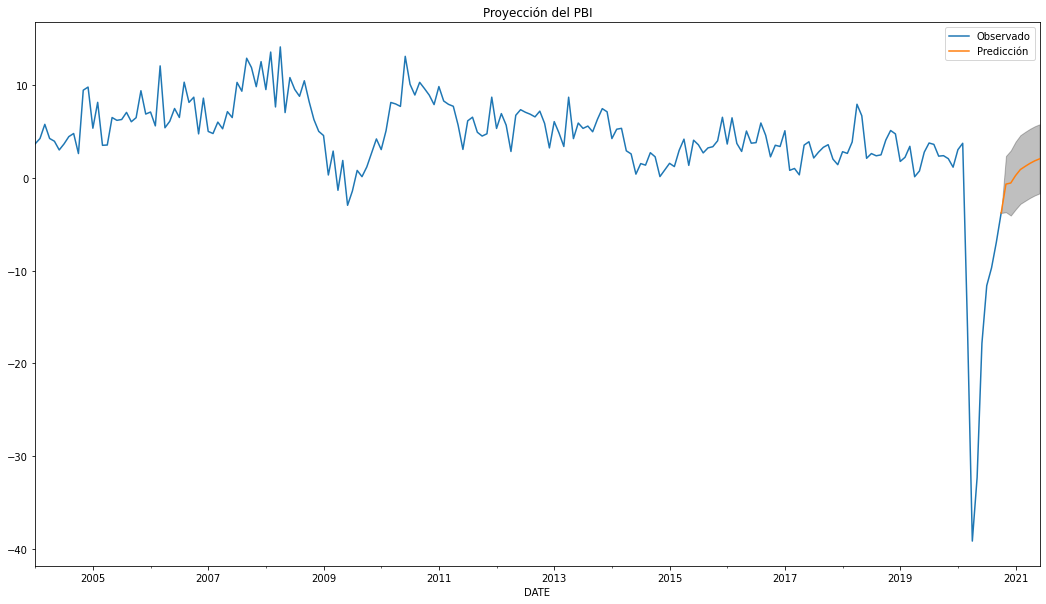

In [8]:
# Generando punto inicial de la media de la proyección
pbif_mean = pred_pbi.predicted_mean
line = pd.to_datetime("2020-10-01", format="%Y-%m-%d")
new_row = pd.DataFrame([-3.790],columns=[0],index=[line])
n_pbifmean = pd.concat([pd.DataFrame(new_row),pbif_mean])
n_pbifmean

# Generando puntos iniciales para los intervalos de confiaza
pred_ci = pred_pbi.conf_int() # Default 95%
line = pd.to_datetime("2020-10-01", format="%Y-%m-%d")
new_row = pd.DataFrame([[-3.790,-3.790]],columns=['lower PBI', 'upper PBI'],index=[line])
n_pred_ci = pd.concat([pd.DataFrame(new_row),pred_ci])
n_pred_ci

# Graficando la proyección
ax = df["PBI"].plot(figsize=(18, 10))
n_pbifmean.plot(ax=ax)
ax.fill_between(n_pred_ci.index,
                n_pred_ci.iloc[:, 0],
                n_pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend(['Observado', 'Predicción'])
plt.title('Proyección del PBI')
plt.show()

In [9]:
# Formato tabla
n_pbifmean.columns = ['Mean']
tabla_F = pd.concat([n_pbifmean, n_pred_ci], axis=1)
tabla_F

,Mean,lower PBI,upper PBI
2020-10-01,-3.790000,-3.790000,-3.790000
2020-11-01,-0.674469,-3.708941,2.360003
2020-12-01,-0.556172,-4.066357,2.954013
2021-01-01,0.247887,-3.409172,3.904946
2021-02-01,0.898095,-2.807308,4.603497
2021-03-01,1.240353,-2.481253,4.961959
2021-04-01,1.564050,-2.163019,5.291119
2021-05-01,1.836853,-1.892061,5.565768
2021-06-01,2.050416,-1.679122,5.779954


# Referencias
Pérez, Fernando, 2018. "Nowcasting Peruvian GDP using Leading Indicators and Bayesian Variable Selection," Working Papers 2018-010, Banco Central de Reserva del Perú.